In [1]:
import tensorflow 
import keras
import pandas
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import *
import xgboost as xgb

ImportError: Traceback (most recent call last):
  File "/Users/apple/anaconda/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 18, in swig_import_helper
    fp, pathname, description = imp.find_module('_pywrap_tensorflow_internal', [dirname(__file__)])
  File "/Users/apple/anaconda/lib/python3.6/imp.py", line 296, in find_module
    raise ImportError(_ERR_MSG.format(name), name=name)
ImportError: No module named '_pywrap_tensorflow_internal'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/apple/anaconda/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 41, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/Users/apple/anaconda/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/Users/apple/anaconda/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 20, in swig_import_helper
    import _pywrap_tensorflow_internal
ModuleNotFoundError: No module named '_pywrap_tensorflow_internal'


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [40]:
import tensorflow 
import keras
import pandas
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import *
import xgboost as xgb

In [41]:
cd /Users/apple/Desktop/ML/HW2

/Users/apple/Desktop/ML/HW2


In [42]:
%matplotlib inline

# Standard Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style='ticks')

In [44]:
dtrain = pd.read_csv('train.csv')
dtest = pd.read_csv('test.csv')

In [45]:
dtrain.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [46]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [47]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
id                892816 non-null int64
ps_ind_01         892816 non-null int64
ps_ind_02_cat     892816 non-null int64
ps_ind_03         892816 non-null int64
ps_ind_04_cat     892816 non-null int64
ps_ind_05_cat     892816 non-null int64
ps_ind_06_bin     892816 non-null int64
ps_ind_07_bin     892816 non-null int64
ps_ind_08_bin     892816 non-null int64
ps_ind_09_bin     892816 non-null int64
ps_ind_10_bin     892816 non-null int64
ps_ind_11_bin     892816 non-null int64
ps_ind_12_bin     892816 non-null int64
ps_ind_13_bin     892816 non-null int64
ps_ind_14         892816 non-null int64
ps_ind_15         892816 non-null int64
ps_ind_16_bin     892816 non-null int64
ps_ind_17_bin     892816 non-null int64
ps_ind_18_bin     892816 non-null int64
ps_reg_01         892816 non-null float64
ps_reg_02         892816 non-null float64
ps_reg_03         892816 non-null float64
ps_

In [48]:
dtest.shape

(892816, 58)

In [49]:
dtrain.target.unique()

array([0, 1])

In [50]:
# binm = np.matrix(dtrain.columns[7:15])

# binm

In [51]:
dtrain.shape

(595212, 59)

In [52]:
features = dtrain.columns[2:]
features

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

In [53]:
testfeatures = dtest.columns[1:]
testfeatures.shape
xtest = dtest[testfeatures].values
xtest.shape
idtest = dtest['id'].values
idtest

array([      0,       1,       2, ..., 1488024, 1488025, 1488026])

In [54]:
xtrain = dtrain[features].values

xtrain
xtrain.shape


(595212, 57)

In [55]:
whos

Variable            Type              Data/Info
-----------------------------------------------
Dense               type              <class 'keras.layers.core.Dense'>
L1                  int               100
L2                  int               50
L3                  int               20
Sequential          type              <class 'keras.models.Sequential'>
StandardScaler      type              <class 'sklearn.preproces<...>ing.data.StandardScaler'>
cat_features        list              n=14
column              str               ps_car_11_cat
dtest               DataFrame                      id  ps_ind_0<...>892816 rows x 58 columns]
dtrain              DataFrame                      id  target  <...>595212 rows x 59 columns]
features            Index             Index(['ps_ind_01', 'ps_i<...>],\n      dtype='object')
idtest              ndarray           892816: 892816 elems, type `int64`, 7142528 bytes (6.8116455078125 Mb)
keras               module            <module 'keras' fr

In [56]:
ytrain = dtrain.target.values
ytrain

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
# bin_train = x_train[7:15]
import itertools

def powerset(L):
  pset = set()
  for n in xrange(len(L) + 1):
    for sset in itertools.combinations(L, n):
      pset.add(sset)
  return pset
# bin_train.shape
''

''

In [57]:
print(dtrain.shape)
print(ytrain.shape)

(595212, 59)
(595212,)


In [58]:
x_train, x_validate = np.split(xtrain,[int(.8 * len(xtrain))])
y_train, y_validate = np.split(ytrain,[int(.8 * len(ytrain))])
y_train.shape

(476169,)

In [59]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [60]:
#IO parameters
L1 = 100
L2 = 50
L3 = 20
num_classes = 2
num_feat = 57

In [22]:
L1 = 100
L2 = 50
L3 = 20
num_classes = 2
num_feat = 57
model = Sequential()
model.add(Dense(units = L1, input_dim = 57, name = 'L1', activation = 'relu'))
model.add(Dense(units=L2,name='L2',activation='relu'))
model.add(Dense(units = L3, input_dim = None, name = 'L3', activation = 'relu'))
model.add(Dense(units = 1, input_dim = None, name = 'Classifier', activation = 'sigmoid'))

#Compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics =['accuracy'])
          

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 100)               5800      
_________________________________________________________________
L2 (Dense)                   (None, 50)                5050      
_________________________________________________________________
L3 (Dense)                   (None, 20)                1020      
_________________________________________________________________
Classifier (Dense)           (None, 1)                 21        
Total params: 11,891
Trainable params: 11,891
Non-trainable params: 0
_________________________________________________________________


In [24]:
#model training

model.fit(x_train, y_train, epochs =20, batch_size = 600)


Epoch 1/20
476169/476169 [==============================] - ETA: 0s - loss: 0.1616 - acc: 0.9636
Epoch 2/20
476169/476169 [==============================] - ETA: 0s - loss: 0.1581 - acc: 0.9636- ETA: 0s - loss
Epoch 3/20
476169/476169 [==============================] - ETA: 0s - loss: 0.1573 - acc: 0.9636
Epoch 4/20
476169/476169 [==============================] - ETA: 0s - loss: 0.1568 - acc: 0.9636
Epoch 5/20
476169/476169 [==============================] - ETA: 0s - loss: 0.1565 - acc: 0.9636
Epoch 6/20
476169/476169 [==============================] - ETA: 0s - loss: 0.1563 - acc: 0.9636
Epoch 7/20
476169/476169 [==============================] - ETA: 0s - loss: 0.1560 - acc: 0.9636
Epoch 8/20
476169/476169 [==============================] - ETA: 0s - loss: 0.1558 - acc: 0.9636
Epoch 9/20
476169/476169 [==============================] - ETA: 0s - loss: 0.1558 - acc: 0.9636
Epoch 10/20
476169/476169 [==============================] - ETA: 0s - loss: 0.1556 - acc: 0.9636
Epoch 11/20
4

In [25]:
# predict on the 80% of train data
y_train_predicted = model.predict(x_train)

In [63]:
from sklearn.metrics import roc_curve, auc

In [27]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predicted, pos_label=None, sample_weight=None, drop_intermediate=True)

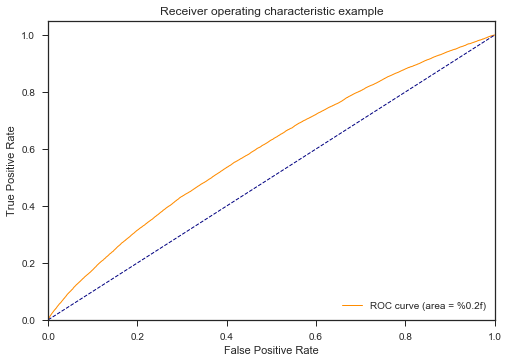

In [29]:

plt.figure()
lw = 1
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [30]:
y_validate_predicted = model.predict(x_validate)

In [31]:
y_validate_predicted

array([[ 0.01463497],
       [ 0.14328413],
       [ 0.02227091],
       ..., 
       [ 0.02628326],
       [ 0.02880504],
       [ 0.01727342]], dtype=float32)

In [32]:
fpr1, tpr1, thresholds1 = roc_curve(y_validate, y_validate_predicted, pos_label=None, sample_weight=None, drop_intermediate=True)

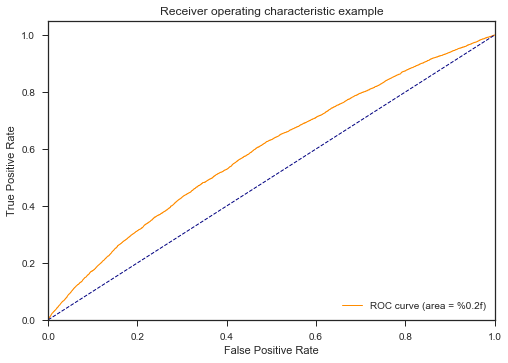

In [33]:
plt.figure()
lw = 1
plt.plot(fpr1, tpr1, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [34]:
xtrain.shape
ytrain.shape

(595212,)

In [35]:
model.fit(xtrain, ytrain, epochs =20, batch_size = 600)

Epoch 1/20
595212/595212 [==============================] - ETA: 0s - loss: 0.1549 - acc: 0.9636
Epoch 2/20
595212/595212 [==============================] - ETA: 0s - loss: 0.1549 - acc: 0.9636
Epoch 3/20
595212/595212 [==============================] - ETA: 0s - loss: 0.1548 - acc: 0.9636
Epoch 4/20
595212/595212 [==============================] - ETA: 0s - loss: 0.1548 - acc: 0.9636
Epoch 5/20
595212/595212 [==============================] - ETA: 0s - loss: 0.1548 - acc: 0.9636
Epoch 6/20
595212/595212 [==============================] - ETA: 0s - loss: 0.1547 - acc: 0.9636
Epoch 7/20
595212/595212 [==============================] - ETA: 0s - loss: 0.1547 - acc: 0.9636
Epoch 8/20
595212/595212 [==============================] - ETA: 0s - loss: 0.1546 - acc: 0.9636
Epoch 9/20
595212/595212 [==============================] - ETA: 0s - loss: 0.1546 - acc: 0.9636
Epoch 10/20
595212/595212 [==============================] - ETA: 0s - loss: 0.1545 - acc: 0.9636
Epoch 11/20
595212/595212 [==

In [88]:
ytest_predicted = model.predict(xtest)
ytest_predicted

ValueError: Error when checking : expected L1_input to have shape (None, 227) but got array with shape (892816, 57)

In [41]:
ytrain_predicted = model.predict(xtrain)

In [37]:
id = dtest.columns[0]
id_test = dtest[id].values
id_test

array([      0,       1,       2, ..., 1488024, 1488025, 1488026])

In [38]:
df = pd.DataFrame({'id' : id_test, 'target': ytest_predicted[:,0]})
df.to_csv("ytest_predicted.csv", index = False)

In [39]:
xtrain.shape

(595212, 57)

In [87]:
fpr2, tpr2, thresholds2 = roc_curve(ytrain, ytrain_predicted, pos_label=None, sample_weight=None, drop_intermediate=True)

NameError: name 'ytrain_predicted' is not defined

In [86]:
g = 2 * auc(fpr2, tpr2) - 1
g

NameError: name 'fpr2' is not defined

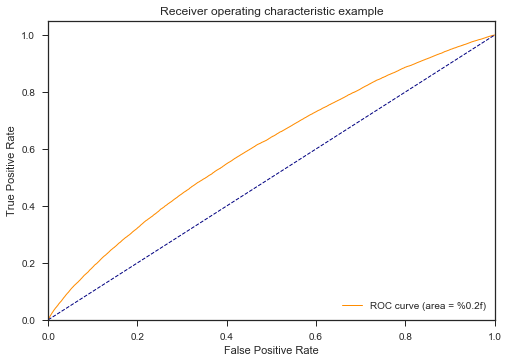

In [43]:
plt.figure()
lw = 1
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [46]:
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [47]:
K = 6
kf = StratifiedKFold(n_splits = K, random_state = 3000, shuffle = True)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [53]:
dtrain.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [68]:
# catcols =[]
# allcols = dtrain.columns[1:]
# for c in allcols:
#     if c.endswith('_cat'):
#         catcols.append(dtrain[c]);

# for cat in catcols:
#     onehotencode(cat)

NameError: name 'onehotencode' is not defined

In [69]:
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE

In [72]:
n_comp = 20
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(xtrain)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])

Explained variance: 0.9944
0.907732701885
0.0254234063215
0.0110337289521
0.0070268753562
0.00628341600314
0.00611974772924
0.00535864726681
0.00453274019813
0.00362930731976
0.00294262288265
0.00239246012144
0.00177464330232
0.00166653490752
0.00151185737228
0.00148285378183
0.00129501399992
0.00120521481347
0.0010727631062
0.00103952906349
0.000841552767779


In [79]:

# import sknn
# from sknn import ae, mlp

# # Initialize auto-encoder for unsupervised learning.
# myae = ae.AutoEncoder(
#             layers=[
#                 ae.Layer("Tanh", units=128),
#                 ae.Layer("Sigmoid", units=64)],
#             learning_rate=0.002,
#             n_iter=10)

# # Layerwise pre-training using only the input data.
# myae.fit(X)

# # Initialize the multi-layer perceptron with same base layers.
# mymlp = mlp.Regressor(
#             layers=[
#                 mlp.Layer("Tanh", units=128),
#                 mlp.Layer("Sigmoid", units=64),
#                 mlp.Layer("Linear")])

# # Transfer the weights from the auto-encoder.
# myae.transfer(mymlp)
# # Now perform supervised-learning as usual.
# mymlp.fit(X, y)

NotImplementedError: No backend sub-module imported.

In [61]:
test_dat = pd.read_csv('test.csv')
train_dat = pd.read_csv('train.csv')


In [64]:

train_y = train_dat['target']
train_x = train_dat.drop(['target', 'id'], axis = 1)
test_dat = test_dat.drop(['id'], axis = 1)

merged_dat = pd.concat([train_x, test_dat],axis=0)

#one hot encode the categoricals
cat_features = [col for col in merged_dat.columns if col.endswith('cat')]
for column in cat_features:
    temp=pd.get_dummies(pd.Series(merged_dat[column]))
    merged_dat=pd.concat([merged_dat,temp],axis=1)
    merged_dat=merged_dat.drop([column],axis=1)


ValueError: labels ['id'] not contained in axis

In [65]:
numeric_features = [col for col in merged_dat.columns if '_calc_' in  str(col)]
numeric_features = [col for col in numeric_features if '_bin' not in str(col)]

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_numerics = scaler.fit_transform(merged_dat[numeric_features])
scaled_num_df = pd.DataFrame(scaled_numerics, columns =numeric_features )

In [67]:
merged_dat = merged_dat.drop(numeric_features, axis=1)

merged_dat = np.concatenate((merged_dat.values,scaled_num_df), axis = 1)



train_x = merged_dat[:train_x.shape[0]]
test_dat = merged_dat[train_x.shape[0]:]

In [68]:
train_x.shape
# train_y.shape

(595212, 227)

In [69]:
L1 = 100
L2 = 50
L3 = 20
num_classes = 2
num_feat = 227
model = Sequential()
model.add(Dense(units = L1, input_dim = 227, name = 'L1', activation = 'relu'))
model.add(Dense(units=L2,name='L2',activation='relu'))
model.add(Dense(units = L3, input_dim = None, name = 'L3', activation = 'relu'))
model.add(Dense(units = 1, input_dim = None, name = 'Classifier', activation = 'sigmoid'))

#Compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics =['accuracy'])

In [70]:
model.fit(train_x, ytrain, epochs =5, batch_size = 600)

Epoch 1/5
595212/595212 [==============================] - ETA: 0s - loss: 0.1731 - acc: 0.9604
Epoch 2/5
595212/595212 [==============================] - ETA: 0s - loss: 0.1588 - acc: 0.9636
Epoch 3/5
595212/595212 [==============================] - ETA: 0s - loss: 0.1568 - acc: 0.9636
Epoch 4/5
595212/595212 [==============================] - ETA: 0s - loss: 0.1559 - acc: 0.9636
Epoch 5/5
595212/595212 [==============================] - ETA: 0s - loss: 0.1552 - acc: 0.9636


In [71]:
y_train_predicted = model.predict(train_x)

In [72]:
fpr3, tpr3, thresholds3 = roc_curve(ytrain, y_train_predicted, pos_label=None, sample_weight=None, drop_intermediate=True)

In [85]:
g = 2 * auc(fpr3, tpr3) - 1
g

0.17067061941509531

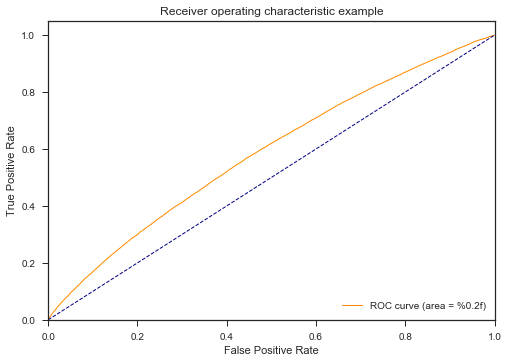

In [73]:

plt.figure()
lw = 1
plt.plot(fpr3, tpr3, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [77]:
x_train_1, x_validate_1 = np.split(train_x,[int(.8 * len(xtrain))])
y_train_1, y_validate_1 = np.split(ytrain,[int(.8 * len(ytrain))])
x_train.shape

(476169, 227)

In [78]:
y_validate_predicted = model.predict(x_validate_1)

In [79]:
fpr4, tpr4, thresholds4 = roc_curve(y_validate_1, y_validate_predicted, pos_label=None, sample_weight=None, drop_intermediate=True)

In [84]:
g = 2 * auc(fpr4, tpr4) - 1
g

0.17230303315460582

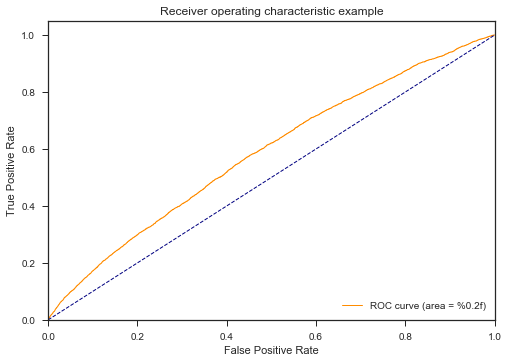

In [80]:
plt.figure()
lw = 1
plt.plot(fpr4, tpr4, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [91]:
x1, x2, y1, y2 = train_test_split(x_train, train['target'], test_size=0.3, random_state=6)
watchlist = [(xgb.DMatrix(x1, y1), 'train'), (xgb.DMatrix(x2, y2), 'valid')]
params = {'eta': 0.09, 'max_depth': 6, 'objective': 'binary:logistic', 'seed': 16, 'silent': True, 'colsample_bytree': 0.6}
model = xgb.train(params, xgb.DMatrix(x1, y1), 1000,  watchlist, feval=gini_xgb, maximize=True, verbose_eval=50, early_stopping_rounds=100)

NameError: name 'train' is not defined

In [ ]:
xgb.plot_importance(booster=model,max_num_features=15)

In [ ]:
import random
random.seed( 3 )
x1, x2, y1, y2 = model_selection.train_test_split(X_train, train['target'], test_size=0.3, random_state=6)
watchlist = [(xgb.DMatrix(x1, y1), 'train'), (xgb.DMatrix(x2, y2), 'valid')]
params = {'eta': 0.09, 'max_depth': 6, 'objective': 'binary:logistic', 'seed': 16, 'silent': True, 'colsample_bytree': 0.6}
model = xgb.train(params, xgb.DMatrix(x1, y1), 1000,  watchlist, feval=gini_xgb, maximize=True, verbose_eval=50, early_stopping_rounds=100)